# Experiments under matroid constraint

Results are produced by executing script **fair.sh** and they are presented in Figure 3.

In [1]:
import os
os.chdir("../../")

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('default')
import seaborn as sns
import glob
import json
from lib import utils
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
sns.set_context("paper", font_scale=4)

In [3]:
name="fair"
datas="credit"
k=32
gamma=0.8580724846537919

final_df = []
cols = sns.color_palette("husl",n_colors=3)

In [4]:
# Read data
vecs = pd.read_csv('data/processed/'+datas+'_vectors.csv', index_col=0, header=0)
px = pd.read_csv('data/processed/'+datas+'_px.csv', index_col=0, header=0)
u = pd.read_csv('data/processed/'+datas+'_pyx.csv', index_col=0, names=["ID", "Probability"], header=0, dtype={'Probability': np.float})

Compute the rejected population per age group by the optimal threshold policy in the non-strategic setting.

In [5]:
rejected_pop=[]
for age in range(4):
    indexes = vecs[(vecs['Age group']==age) & (u['Probability']<gamma)].index
    pop = 0
    for i in indexes:
        pop += px.loc[i]['Population']
    rejected_pop.append(pop)

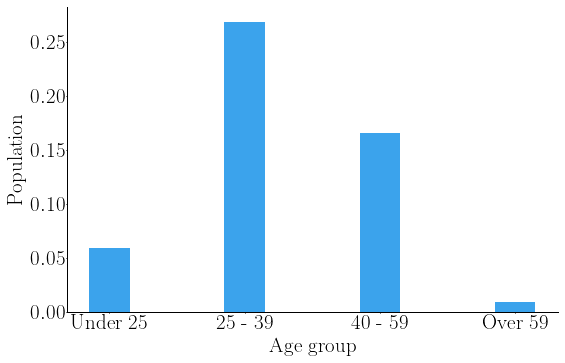

In [6]:
utils.latexify(8.8,5.5, font_scale=3.0)

labels = ['Under 25','25 - 39','40 - 59','Over 59']
x = np.arange(len(labels))
width = 0.3

fig, ax = plt.subplots()
rects1 = ax.bar(x, rejected_pop, width, label='Greedy', color=cols[2])

ax.set_ylabel('Population')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_xlabel('Age group')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.savefig("./figures/counterfactuals/fair_population.pdf", bbox_inches='tight', )

In [7]:
# Read best-responses
br_det_files = glob.glob("./outputs/counterfactuals/{name}_greedydet_data_{datas}_k_{k}_a_2_*_config.json".format(name=name, datas=datas, k=k))
br_fair_files = glob.glob("./outputs/counterfactuals/{name}_greedyfair_data_{datas}_k_{k}_a_2_*_config.json".format(name=name, datas=datas, k=k))
for fi in br_det_files:
    with open(fi,"r") as file:
        temp = json.load(file)
        det_best_responses = temp['best_responses']
        
for fi in br_fair_files:
    with open(fi,"r") as file:
        temp = json.load(file)
        fair_best_responses = temp['best_responses']

Find the number of explanations per age group under a cardinality and a matroid constraint.

In [8]:
det_changed = {k:v for k,v in det_best_responses.items() if int(k)!=int(v)}
det_effective_solution_set = np.unique(np.array([v for k,v in det_changed.items()]))

fair_changed = {k:v for k,v in fair_best_responses.items() if int(k)!=int(v)}
fair_effective_solution_set = np.unique(np.array([v for k,v in fair_changed.items()]))

In [9]:
det_ex_dist = np.zeros(4)
for ex in det_effective_solution_set:
    det_ex_dist[int(vecs.loc[ex]['Age group'])]+=1
    
fair_ex_dist = np.zeros(4)
for ex in fair_effective_solution_set:
    fair_ex_dist[int(vecs.loc[ex]['Age group'])]+=1

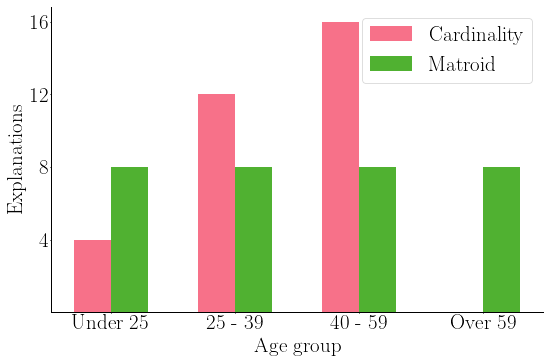

In [10]:
utils.latexify(8.8,5.5, font_scale=3.0)

labels = ['Under 25','25 - 39','40 - 59','Over 59']
x = np.arange(len(labels))
width = 0.3

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, det_ex_dist, width, label='Cardinality', color=cols[0])
rects2 = ax.bar(x + width/2, fair_ex_dist, width, label='Matroid', color=cols[1])

ax.set_ylabel('Explanations')
ax.set_xticks(x)
ax.set_yticks([4, 8, 12, 16])
ax.set_xticklabels(labels)
ax.set_xlabel('Age group')
ax.legend()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.savefig("./figures/counterfactuals/fair_explanations_set.pdf",bbox_inches='tight', )

Compute the relative improvement of each age group.

In [11]:
det_improv = np.zeros(4)
fair_improv = np.zeros(4)

for sour, tar in det_changed.items():
    s=int(sour)
    t=int(tar)
    age_group = int(vecs.loc[s]['Age group'])
    det_improv[age_group]+=px.loc[s]['Population']*(u.loc[t]['Probability']-u.loc[s]['Probability'])
    
det_improv = np.divide(det_improv, rejected_pop)

for sour, tar in fair_changed.items():
    s=int(sour)
    t=int(tar)
    age_group = int(vecs.loc[s]['Age group'])
    fair_improv[age_group]+=px.loc[s]['Population']*(u.loc[t]['Probability']-u.loc[s]['Probability'])

fair_improv = np.divide(fair_improv, rejected_pop)

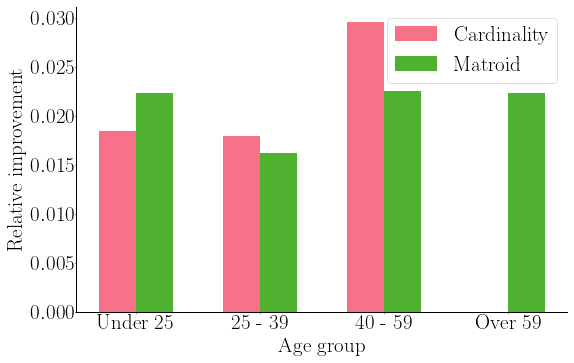

In [12]:
utils.latexify(8.8,5.5, font_scale=3.0)

labels = ['Under 25','25 - 39','40 - 59','Over 59']
x = np.arange(len(labels))
width = 0.3

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, det_improv, width, label='Cardinality', color=cols[0])
rects2 = ax.bar(x + width/2, fair_improv, width, label='Matroid', color=cols[1])

ax.set_ylabel('Relative improvement')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_xlabel('Age group')
ax.legend()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.savefig("./figures/counterfactuals/fair_improvement.pdf",bbox_inches='tight', )